In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#https://github.com/shivam-bhardwaj-sb/Face-Mask-Detection/blob/main/Face%20Mask%20Final.ipynb
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
import os

In [3]:
pre_trained_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3),
    include_top=False, weights='imagenet'
)

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
#Last layer is getting flatten
#Flatten to single element vector
#(#of stack, 12,12,768)
#Changes it to an array when it's flatten.
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           
``
model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
base='/content/gdrive/My Drive/Merge_Data/'
a=os.path.join(base, 'face-mask')
b=os.path.join(a, 'Train')
Train_Mirror=os.path.join(b, 'Mask')
c=os.listdir(Train_Mirror)
Train_NoMirror=os.path.join(b, 'No Mask')
d=os.listdir(Train_NoMirror)

p=os.path.join(base, 'face-mask')
q=os.path.join(p, 'Test')
Test_Mirror=os.path.join(q, 'Mask')
r=os.listdir( Test_Mirror )

Test_NoMirror=os.path.join(q, 'No Mask')
s=os.listdir( Test_NoMirror )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(b,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator =  test_datagen.flow_from_directory(q,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 8906 images belonging to 2 classes.
Found 475 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=5,
                              validation_steps=9,
                              verbose=1)

Epoch 1/5
12/12 [==============================] - 419s 35s/step - loss: 1.7328 - accuracy: 0.6388 - val_loss: 0.0777 - val_accuracy: 0.9889
Epoch 2/5
12/12 [==============================] - 354s 30s/step - loss: 0.1683 - accuracy: 0.9434 - val_loss: 0.0257 - val_accuracy: 0.9833
Epoch 3/5
12/12 [==============================] - 293s 24s/step - loss: 0.1436 - accuracy: 0.9442 - val_loss: 0.0152 - val_accuracy: 0.9944
Epoch 4/5
12/12 [==============================] - 281s 23s/step - loss: 0.1090 - accuracy: 0.9639 - val_loss: 0.0244 - val_accuracy: 0.9889
Epoch 5/5
12/12 [==============================] - 251s 21s/step - loss: 0.0497 - accuracy: 0.9777 - val_loss: 0.0191 - val_accuracy: 0.9944


### Graphing

Text(0.5, 1.0, 'Training and validation loss')

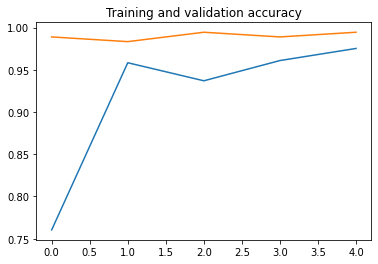

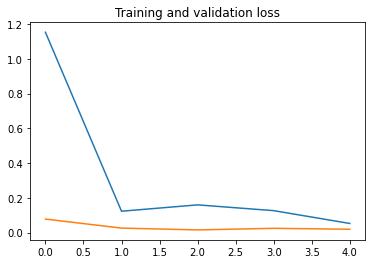

In [ ]:
acc= history.history['accuracy' ]
val_acc= history.history[ 'val_accuracy' ]
loss= history.history['loss' ]
val_loss= history.history['val_loss']

epochs= range(len(acc)) 

plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs, loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
model.save("Face Mask TL.h5")

# Prediction


In [ ]:
import keras
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread('/content/gdrive/My Drive/Dataset6/IMG_1108.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('/content/gdrive/My Drive/Dataset6/IMG_1108.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

[[0.15541306]]


[[0.1123355]]


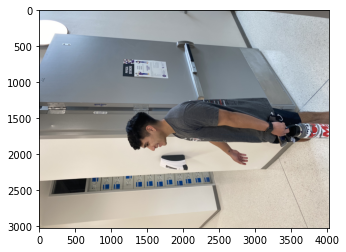

In [ ]:
img = mpimg.imread('/content/gdrive/My Drive/Dataset6/IMG_1127.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('/content/gdrive/My Drive/Dataset6/IMG_1127.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

[[0.15541306]]


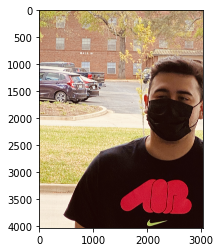

In [ ]:

img = mpimg.imread('/content/gdrive/My Drive/Dataset6/IMG_1108.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('/content/gdrive/My Drive/Dataset6/IMG_1108.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)